* Jeremy Beard

* Due 20220417

* Week 6

* MSDS650

* Genie Hays

# Week 6 Lab: Unsupervised Learning

<img align="right" style="padding-right:10px;" src="figures_wk6/kmeans.png" width=300><br>

This week's assignment will focus completeing a K-Means analysis.

## Our Dataset: 
**Dataset:** wine_fraud.csv(Provided in folder assign_wk6)

Remember to take a look at the wine.names files for a better understanding of the dataset. You can also read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/wine).


## Unsupervised Learning

**Objective:** 
   - Use K-Means for this analysis: State and defend all your assumptions about the dataset. Defend yourself!!!
       * Make sure you cleanup your data, including the readability of your dataset
       * EDA!!!  Explore your data!
       * Categorical vs numeric columns in your dataset
       * Would normalizing your dataset help? 
   - Cluster the wines to see if there are some natural groupings
   - Use PCA to plot the clusters
   - Discover any insights from this analysis? (include numbers/graphs corresponding to your reasoning)
       * Summarize your findings.
       * What does the PCA plot tell you about your clustering?


### Deliverables:

Upload your notebook's .ipynb file (This assignment can be done in one or two notebooks. The choice it up to you!) 
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

# I. Introduction

(It appears that I never truly finished the introduction for the last assignment. Whoops! I'm sorry)

In this assignment we will first import the wine_fraud dataset and clean it. We will then perform some Exploratory Data Analysis (EDA) on the data and then perform a K Means analysis. This will involve iteratively working through each k value in a range, to find the optimal k value according to a scoring criteria. Two scoring criteria will be used. It was found that each scoring criteria enabled a different optimal k value. 

At the end of the notebook, any conclusions or insights will be drawn and finally references will be given. 

# II. Methods, III. Code, and IV. Analysis of Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

sns.set()

In [2]:
# Use K-Means for this analysis: State and defend all your 
#   assumptions about the dataset. Defend yourself!!!
## Make sure you cleanup your data, including the readability of dataset
## EDA!!! Explore your data!
## Categorical vs numeric columns in your dataset
## Would normalizing your dataset help?

# Use PCA to plot the clusters
# Discover any insights from this analysis? (include numbers/graphs corresponding to your reasoning)
## Summarize your findings.
## What does the PCA plot tell you about your clustering?

So, we will first start with importing the dataset and then cleaning it

In [3]:
#I will start by making column names and assigning them to the dataset. 
#I got these column names from wine.names file.
names = ['cultivator', 'alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 
         'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 
         'proanthocyanins', 'color_intensity', 'hue', 'OD280_OD315_of_diluted_wines', 'proline']

#Read dataaaa!
wine = pd.read_csv('assign_wk6/wine_fraud.csv', names=names)
wine.head(20)

,cultivator,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
0,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
3,1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
5,1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
7,1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290
8,1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
9,1,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045


In [4]:
# let's drop the first row, that looks like the labels
wine = wine.drop([0])
wine.head(20)

,cultivator,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
3,1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
5,1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
7,1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290
8,1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
9,1,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045
10,1,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [5]:
# let's get some metainfo about the data
wine.shape

(178, 14)

In [6]:
# let's get some metainfo about the data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 1 to 178
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   cultivator                    178 non-null    object
 1   alcohol                       178 non-null    object
 2   malic_acid                    178 non-null    object
 3   ash                           178 non-null    object
 4   ash_alcalinity                178 non-null    object
 5   magnesium                     178 non-null    object
 6   total_phenols                 178 non-null    object
 7   flavanoids                    178 non-null    object
 8   nonflavanoid_phenols          178 non-null    object
 9   proanthocyanins               178 non-null    object
 10  color_intensity               178 non-null    object
 11  hue                           178 non-null    object
 12  OD280_OD315_of_diluted_wines  178 non-null    object
 13  proline             

Why are they all 'objects'? It appears the data is all numeric. 
Maybe it's as simple as casting them as integers/floats.

Now, let's do some Exploratory Data Analysis (EDA) and find some metainfo and overall statistics about the dataset

##### EDA

In [7]:
wine.isnull().sum()

cultivator                      0
alcohol                         0
malic_acid                      0
ash                             0
ash_alcalinity                  0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280_OD315_of_diluted_wines    0
proline                         0
dtype: int64

In [8]:
wine.nunique()

cultivator                        3
alcohol                         126
malic_acid                      133
ash                              79
ash_alcalinity                   63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
OD280_OD315_of_diluted_wines    122
proline                         121
dtype: int64

It appears that indeed we can just cast them all as numeric data! This is great news.

No categorical data! It could be argued that 'cultivator' is categorical data. This column will not be used in the features however.

In [9]:
wine['cultivator'] = wine['cultivator'].astype(int)
wine['alcohol'] = wine['alcohol'].astype(float)
wine['malic_acid'] = wine['malic_acid'].astype(float)
wine['ash'] = wine['ash'].astype(float)
wine['ash_alcalinity'] = wine['ash_alcalinity'].astype(float)
wine['magnesium'] = wine['magnesium'].astype(float)
wine['total_phenols'] = wine['total_phenols'].astype(float)
wine['flavanoids'] = wine['flavanoids'].astype(float)
wine['nonflavanoid_phenols'] = wine['nonflavanoid_phenols'].astype(float)
wine['proanthocyanins'] = wine['proanthocyanins'].astype(float)
wine['color_intensity'] = wine['color_intensity'].astype(float)
wine['hue'] = wine['hue'].astype(float)
wine['OD280_OD315_of_diluted_wines'] = wine['OD280_OD315_of_diluted_wines'].astype(float)
wine['proline'] = wine['proline'].astype(float)

In [10]:
# let's get some metainfo about the data
wine.describe()

,cultivator,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
wine.cultivator.value_counts()

2    71
1    59
3    48
Name: cultivator, dtype: int64

In [12]:
wine.alcohol.value_counts()

13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: alcohol, Length: 126, dtype: int64

In [13]:
wine.malic_acid.value_counts()

1.73    7
1.67    4
1.81    4
1.68    3
1.61    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: malic_acid, Length: 133, dtype: int64

In [14]:
wine.ash.value_counts()

2.30    7
2.28    7
2.70    6
2.32    6
2.36    6
       ..
2.16    1
2.53    1
1.75    1
1.71    1
2.37    1
Name: ash, Length: 79, dtype: int64

In [15]:
wine.ash_alcalinity.value_counts()

20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
12.4     1
17.1     1
16.4     1
16.3     1
27.0     1
Name: ash_alcalinity, Length: 63, dtype: int64

In [16]:
wine.magnesium.value_counts()

88.0     13
86.0     11
98.0      9
101.0     9
96.0      8
102.0     7
94.0      6
85.0      6
112.0     6
97.0      5
92.0      5
80.0      5
103.0     5
89.0      5
90.0      4
108.0     4
107.0     4
106.0     4
87.0      3
120.0     3
95.0      3
78.0      3
111.0     3
84.0      3
118.0     3
104.0     3
100.0     3
110.0     3
116.0     3
93.0      2
115.0     2
91.0      2
105.0     2
113.0     2
162.0     1
134.0     1
119.0     1
82.0      1
122.0     1
81.0      1
70.0      1
127.0     1
132.0     1
99.0      1
136.0     1
139.0     1
151.0     1
117.0     1
128.0     1
124.0     1
126.0     1
121.0     1
123.0     1
Name: magnesium, dtype: int64

In [17]:
wine.total_phenols.value_counts()

2.20    8
2.80    6
3.00    6
2.60    6
2.00    5
       ..
3.52    1
2.23    1
2.63    1
2.36    1
1.59    1
Name: total_phenols, Length: 97, dtype: int64

In [18]:
wine.flavanoids.value_counts()

2.65    4
2.03    3
2.68    3
0.60    3
1.25    3
       ..
2.78    1
2.90    1
3.74    1
3.27    1
0.69    1
Name: flavanoids, Length: 132, dtype: int64

In [19]:
wine.nonflavanoid_phenols.value_counts()

0.43    11
0.26    11
0.29    10
0.32     9
0.27     8
0.30     8
0.34     8
0.40     8
0.37     8
0.24     7
0.53     7
0.22     6
0.21     6
0.28     5
0.52     5
0.50     5
0.17     5
0.39     5
0.47     4
0.42     4
0.63     4
0.48     4
0.60     3
0.58     3
0.45     3
0.61     3
0.25     2
0.14     2
0.31     2
0.19     2
0.20     2
0.13     1
0.35     1
0.55     1
0.33     1
0.66     1
0.41     1
0.44     1
0.56     1
Name: nonflavanoid_phenols, dtype: int64

In [20]:
wine.proanthocyanins.value_counts()

1.35    9
1.46    7
1.87    6
1.25    5
1.66    4
       ..
2.28    1
0.62    1
0.41    1
2.04    1
1.41    1
Name: proanthocyanins, Length: 101, dtype: int64

In [21]:
wine.color_intensity.value_counts()

2.60    4
4.60    4
3.80    4
3.40    3
5.00    3
       ..
6.30    1
7.05    1
7.20    1
8.90    1
9.20    1
Name: color_intensity, Length: 132, dtype: int64

In [22]:
wine.hue.value_counts()

1.04    8
1.23    7
1.12    6
0.57    5
0.89    5
       ..
1.27    1
0.90    1
1.71    1
0.69    1
0.64    1
Name: hue, Length: 78, dtype: int64

In [23]:
wine.OD280_OD315_of_diluted_wines.value_counts()

2.87    5
1.82    4
3.00    4
2.78    4
1.56    3
       ..
2.23    1
2.46    1
1.59    1
1.67    1
1.60    1
Name: OD280_OD315_of_diluted_wines, Length: 122, dtype: int64

In [24]:
wine.proline.value_counts()

680.0     5
520.0     5
625.0     4
750.0     4
630.0     4
         ..
1265.0    1
1260.0    1
1080.0    1
885.0     1
840.0     1
Name: proline, Length: 121, dtype: int64

In [25]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 1 to 178
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cultivator                    178 non-null    int32  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   ash_alcalinity                178 non-null    float64
 5   magnesium                     178 non-null    float64
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280_OD315_of_diluted_wines  178 non-null    float64
 13  proli

<AxesSubplot:>

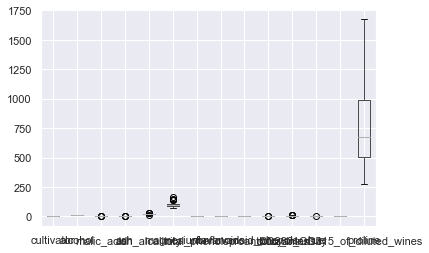

In [26]:
wine.boxplot()

The following plots break up the features so they are each clearly visible. You can see how if all features are plotted on the same plot, it can be difficult to see some features.

<AxesSubplot:>

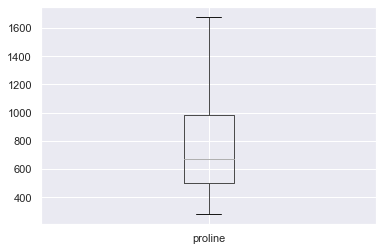

In [27]:
wine.iloc[:,13:14].boxplot()

<AxesSubplot:>

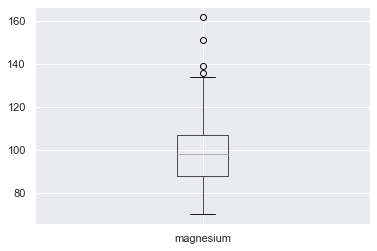

In [28]:
wine.iloc[:,5:6].boxplot()

<AxesSubplot:>

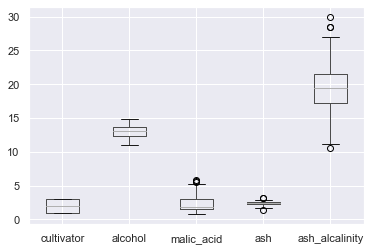

In [29]:
wine.iloc[:,0:5].boxplot()

<AxesSubplot:>

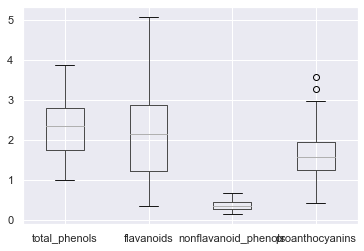

In [30]:
wine.iloc[:,6:10].boxplot()

<AxesSubplot:>

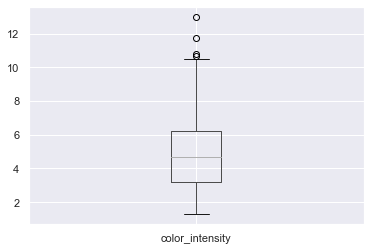

In [31]:
wine.iloc[:,10:11].boxplot()

<AxesSubplot:>

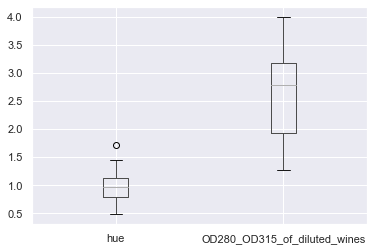

In [32]:
wine.iloc[:,11:13].boxplot()

Awesome! There's not much cleaning to be done! Let's move on

In [33]:
wine.iloc[0]

cultivator                         1.00
alcohol                           14.23
malic_acid                         1.71
ash                                2.43
ash_alcalinity                    15.60
magnesium                        127.00
total_phenols                      2.80
flavanoids                         3.06
nonflavanoid_phenols               0.28
proanthocyanins                    2.29
color_intensity                    5.64
hue                                1.04
OD280_OD315_of_diluted_wines       3.92
proline                         1065.00
Name: 1, dtype: float64

In [34]:
wine.iloc[[0]]

,cultivator,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
1,1,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0


In [35]:
wine.shape

(178, 14)

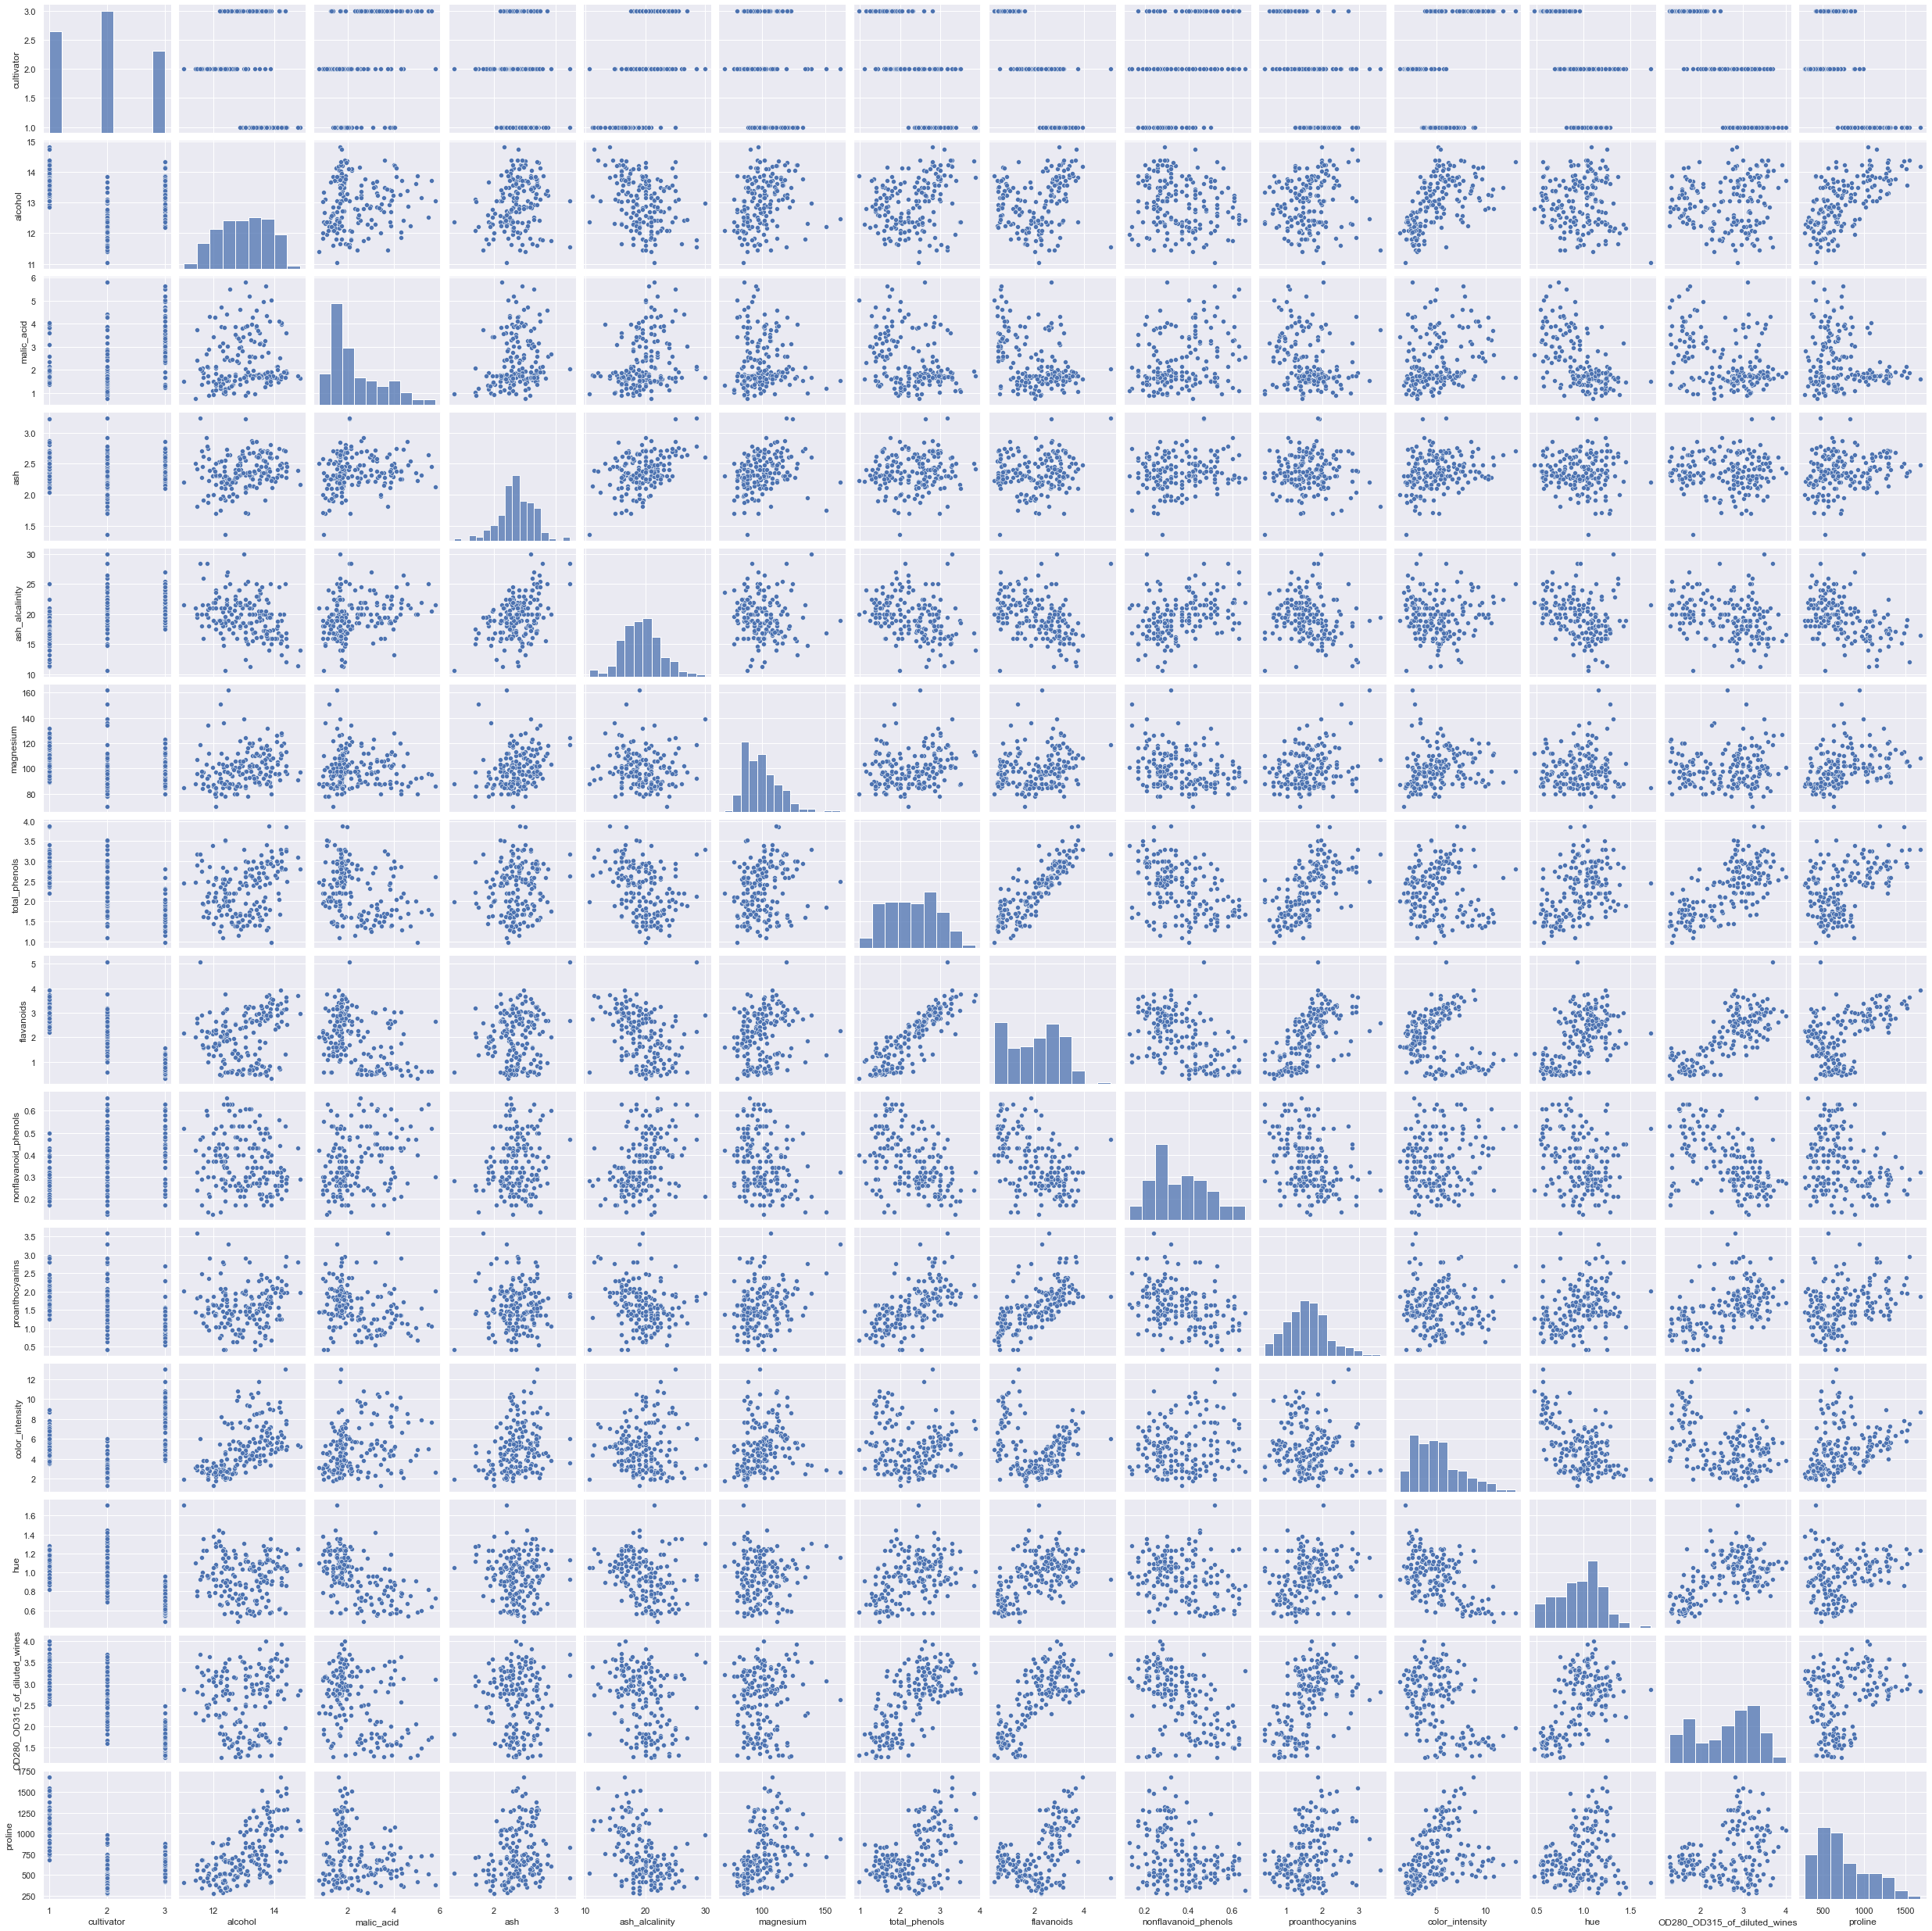

In [36]:
sns.pairplot(wine)

<function matplotlib.pyplot.show(close=None, block=None)>

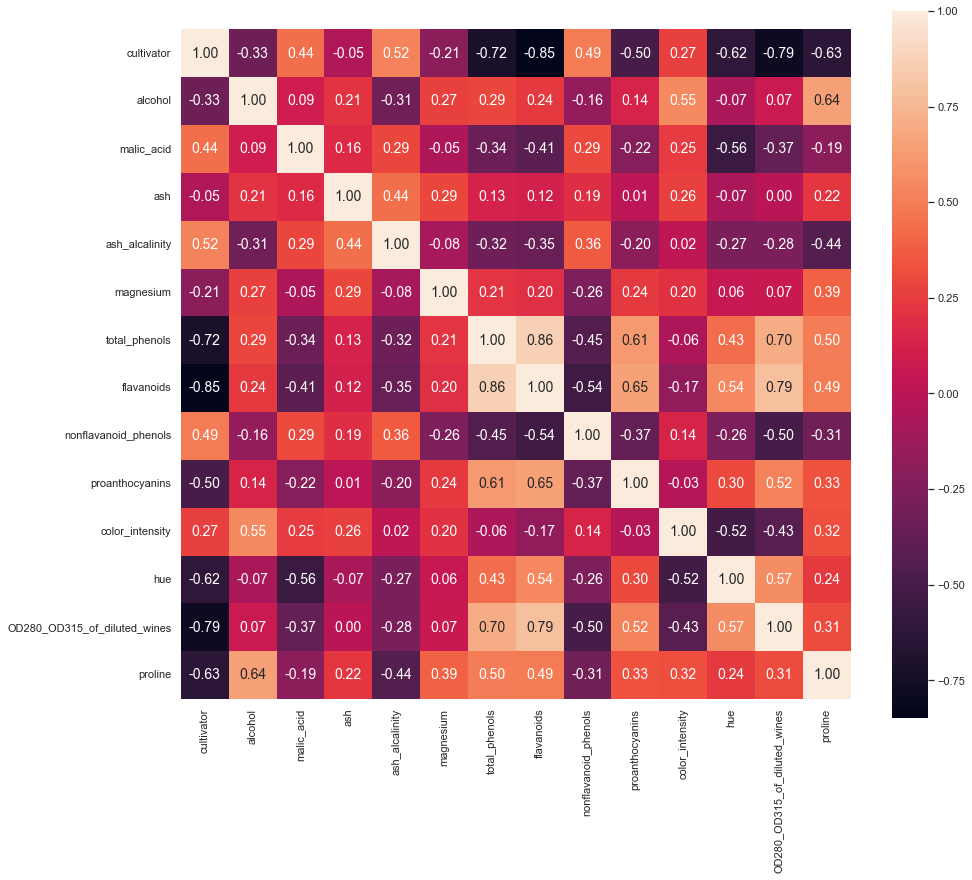

In [37]:
corrmat = wine.corr()
f, ax = plt.subplots(figsize=(15,13)) #setting some parameters of the plot to help readability
#sns.heatmap(corrmat, vmax = .8, square=True)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14})
plt.show

In [38]:
X = wine.drop(columns=['cultivator'])
y = wine['cultivator']

In [39]:
X

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
175,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
176,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
177,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [40]:
y

1      1
2      1
3      1
4      1
5      1
      ..
174    3
175    3
176    3
177    3
178    3
Name: cultivator, Length: 178, dtype: int32

In [41]:
rfr = RandomForestRegressor()
rfr.fit(X,y)

RandomForestRegressor()

In [42]:
importance_list = list(zip(X.columns, rfr.feature_importances_))
sorted_importance = sorted(importance_list, key = lambda x: x[1], reverse=True)
sorted_importance

[('flavanoids', 0.468135877033748),
 ('proline', 0.19967731468454183),
 ('OD280_OD315_of_diluted_wines', 0.15319909868949885),
 ('color_intensity', 0.09141918942699932),
 ('alcohol', 0.051070613597567996),
 ('hue', 0.019696654894229622),
 ('ash_alcalinity', 0.005251700205905148),
 ('magnesium', 0.0044421368699076496),
 ('ash', 0.0019783825138080745),
 ('malic_acid', 0.0017551286621744966),
 ('proanthocyanins', 0.0017436861194308018),
 ('total_phenols', 0.0013788726648526531),
 ('nonflavanoid_phenols', 0.0002513446373355088)]

In [43]:
max_feature_len = len(max(X.columns, key=len))

In [44]:
for feature, rank in sorted_importance:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

flavanoids: .................. 46.81%
proline: ..................... 19.97%
OD280_OD315_of_diluted_wines:  15.32%
color_intensity: ............. 9.14%
alcohol: ..................... 5.11%
hue: ......................... 1.97%
ash_alcalinity: .............. 0.53%
magnesium: ................... 0.44%
ash: ......................... 0.20%
malic_acid: .................. 0.18%
proanthocyanins: ............. 0.17%
total_phenols: ............... 0.14%
nonflavanoid_phenols: ........ 0.03%


So it appears that there are many features which don't affect the 'cultivator' column and would not help us predict the class of wine.

I will drop any columns which scored less than 1% on this feature importance study!

In [45]:
X = wine.drop(columns=['cultivator', 'total_phenols', 
                       'nonflavanoid_phenols', 'proanthocyanins', 'malic_acid',
                       'ash', 'magnesium', 'ash_alcalinity'])

In [46]:
X

,alcohol,flavanoids,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
1,14.23,3.06,5.64,1.04,3.92,1065.0
2,13.20,2.76,4.38,1.05,3.40,1050.0
3,13.16,3.24,5.68,1.03,3.17,1185.0
4,14.37,3.49,7.80,0.86,3.45,1480.0
5,13.24,2.69,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...
174,13.71,0.61,7.70,0.64,1.74,740.0
175,13.40,0.75,7.30,0.70,1.56,750.0
176,13.27,0.69,10.20,0.59,1.56,835.0
177,13.17,0.68,9.30,0.60,1.62,840.0


<function matplotlib.pyplot.show(close=None, block=None)>

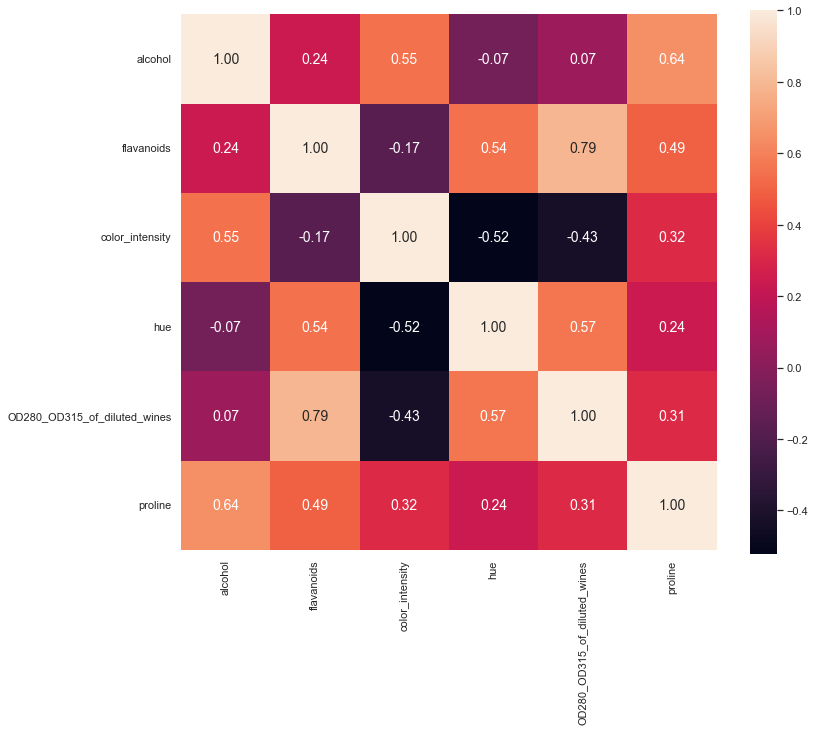

In [47]:
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
#sns.heatmap(corrmat, vmax = .8, square=True)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14})
plt.show

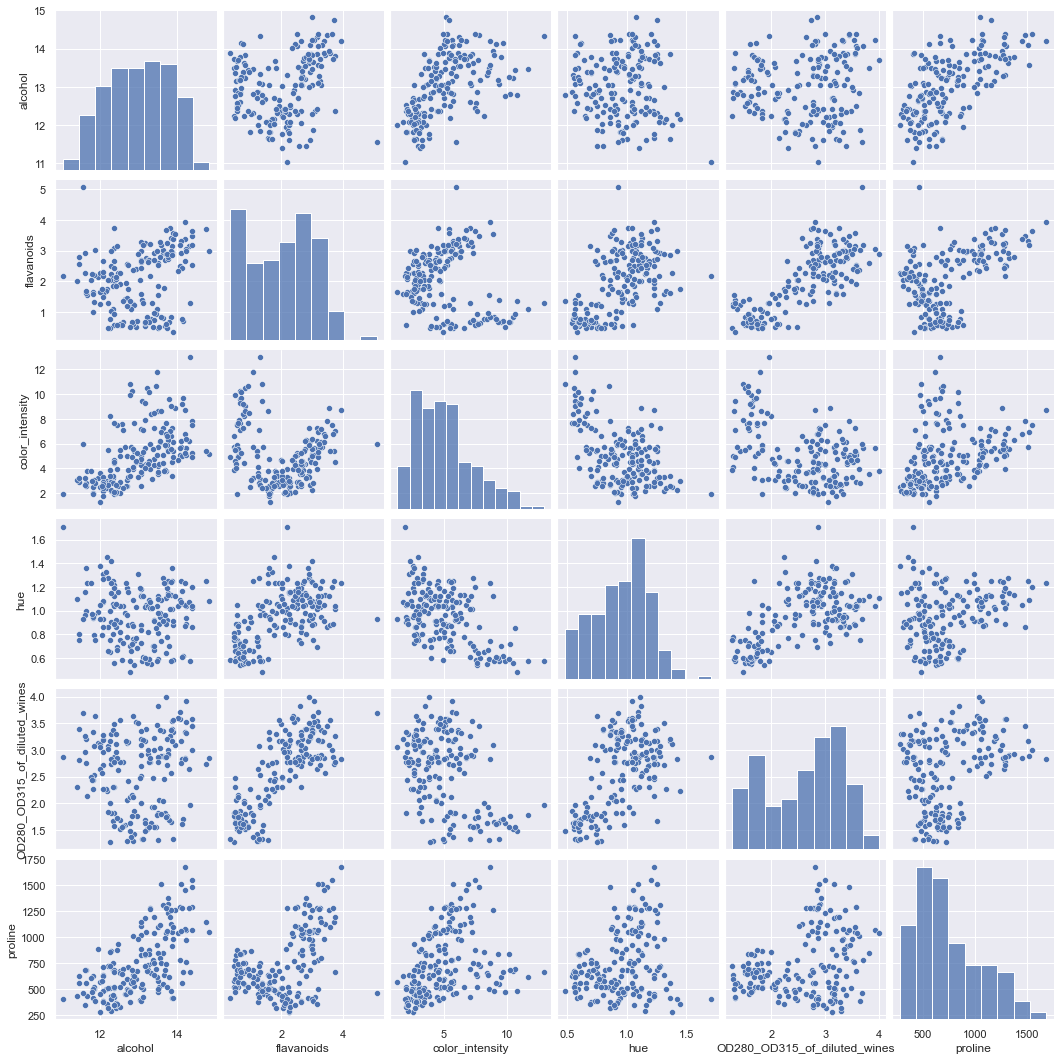

In [57]:
sns.pairplot(X)

##### Clustering the data using default KMeans scoring

Now that I've set the features of the data (should I normalize it?), I will move on with finding the optimal number of clusters for the data

Note that this will be scoring the cluster values based on the opposite of the value of X on the K-means objective, stated in the documentation 

In [48]:
sum_sq = []

# let try to fit the model for 2 to 40 clusters and add to the array
max_range = 40
for n in range(2,max_range):
    
    
    # random_state makes the results reproducible 
    # n_jobs=-1 means run with all machine processors
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X)
    sum_sq.append(-model.score(X))
    # score=Opposite of the value of X on the K-means objective.
    print(f'Score for {n} clusters: {-1*model.score(X)}')
    
    

Score for 2 clusters: 4509098.223128581
Score for 3 clusters: 2338963.330696175
Score for 4 clusters: 1299969.9003588276
Score for 5 clusters: 887749.9870547614
Score for 6 clusters: 618691.0664940587
Score for 7 clusters: 382379.99710480834
Score for 8 clusters: 293850.89422149217
Score for 9 clusters: 242309.51659776995
Score for 10 clusters: 191158.61233399407
Score for 11 clusters: 165150.59350827493
Score for 12 clusters: 130504.96827278372
Score for 13 clusters: 116205.7746724238
Score for 14 clusters: 95448.1984635491
Score for 15 clusters: 87723.5339814062
Score for 16 clusters: 74650.23646694547
Score for 17 clusters: 65093.594207374146
Score for 18 clusters: 57506.097133127536
Score for 19 clusters: 49469.67712746618
Score for 20 clusters: 42662.99810500261
Score for 21 clusters: 38587.016565746984
Score for 22 clusters: 35241.88544767726
Score for 23 clusters: 32575.520596010625
Score for 24 clusters: 29759.260712006304
Score for 25 clusters: 26176.057234449163
Score for 26 

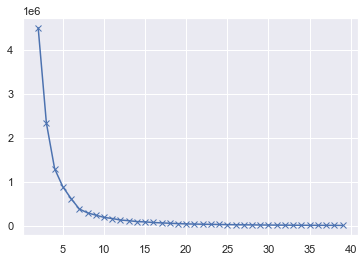

In [49]:
#let's create a scree plot to see if we can see
#the optimal k value
plt.plot(range(2, max_range), sum_sq, 'bx-')

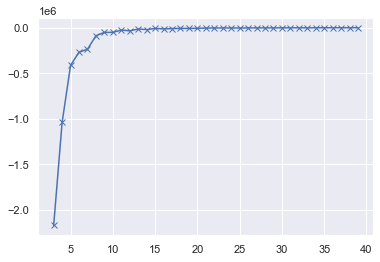

In [50]:
#now let's compare it to the dff plot to see if that gives a
#better picture
plt.plot(range(3, max_range), np.diff(sum_sq), 'bx-')

So, I would say the results really start to flatten out around k = 8 clusters.

Let's go with 8!

Now let's re-run the model with the optimal number of clusters, 8 clusters

##### Re-running model with optimal cluster value k

In [51]:
model = KMeans(n_clusters=8, random_state=42, n_jobs=-1)
model.fit(X)

# gather the predictions
preds= model.predict(X)

In [52]:
# now let's use silhouette scores to evaluate the model!
score = metrics.silhouette_score(X, preds)
score

0.5728964658191351

I'd say 0.57 is a decent score! However, I will still go through the exercise of visualizing the data using Pricipal Component Analysis (PCA). Let's start!

##### Using PCA to Plot Clusters

Text(0.5, 1.0, 'Projection of 8 Clusters on the axis of the PCA')

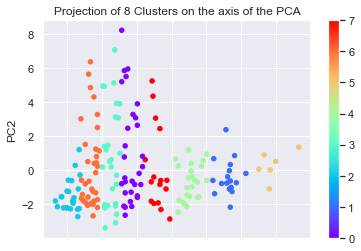

In [53]:
pca = PCA(n_components=6)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind = 'scatter', x = 0, y = 1, c = preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of 8 Clusters on the axis of the PCA')

Just out of curiosity, I want to see how using silhouette score for cluster would change the optimal value k. Let's see!

##### Using silhouette score for cluster investigation

In [54]:
for n in range (2, max_range):
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(X)
    # gather predictions
    preds = model.predict(X)
    score = metrics.silhouette_score(X, preds)
    print(f'Silhouette score for {n} clusters: {score}')

Silhouette score for 2 clusters: 0.6603525189977778
Silhouette score for 3 clusters: 0.5802301996927046
Silhouette score for 4 clusters: 0.5741966553192941
Silhouette score for 5 clusters: 0.564713547337309
Silhouette score for 6 clusters: 0.5823118651675496
Silhouette score for 7 clusters: 0.586801975785776
Silhouette score for 8 clusters: 0.5728964658191351
Silhouette score for 9 clusters: 0.5615211736801489
Silhouette score for 10 clusters: 0.5643849442121299
Silhouette score for 11 clusters: 0.5581068867645529
Silhouette score for 12 clusters: 0.5726606272226764
Silhouette score for 13 clusters: 0.5537072547618751
Silhouette score for 14 clusters: 0.5771845507952127
Silhouette score for 15 clusters: 0.5688200152962031
Silhouette score for 16 clusters: 0.5698687702164444
Silhouette score for 17 clusters: 0.5706648026926902
Silhouette score for 18 clusters: 0.5572418081101399
Silhouette score for 19 clusters: 0.5685352193163749
Silhouette score for 20 clusters: 0.5778148584209329
Sil

Wow! So it looks like using the silhouette score, 2 clusters is the optimal value for k. Let's go with that then! Interesting...

Now let's viisualize k=2 on a PCA plot

##### Visualizing k=2 on a PCA plot

In [55]:
model = KMeans(n_clusters=2, random_state=42, n_jobs=-1)
model.fit(X)

# gather predictions
preds= model.predict(X)

score = metrics.silhouette_score(X, preds)
score

0.6603525189977778

Text(0.5, 1.0, 'Projection of the clustering on the axis of the PCA')

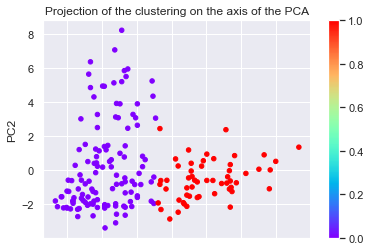

In [56]:
#visualize the clusters
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on the axis of the PCA')

I think that looks better with just 2 clusters!

# V. Conclusion

In conclusion, the KMeans analysis was successful! 

Even before the KMeans analysis was conducted, it was found that many features did not contribute overall to the class of wine, so these features were dropped. After the data cleaning and EDA, the KMeans analysis began. An optimal value of k was found using both the default sklearn.KMeans scoring, and the silhouette score. It appears that while the default scoring of the sklearn.KMeans package tells us that the optimal value of k was 8, using the silhouette score informed us that 2 was actually the optimal value of k. In the end, 2 clusters seemed to give the clearest picture. 

This assignment was interesting and thought-provoking and I like how it compared two methods of finding an optimal k value for K Means Analysis. It reinforces the point that multiple perspectives need considered with any study, and it's always good to get a second opinion.

Thank you!
Jeremy

# VI. References

!) From the Experts PDF: Week 6

2) Week 6 Assignment Lab (Jupyter notebook)

3) UCI Machine Learning Repository: Wine Data Set. (1998, September 21). UCI Machine Learning Repository. Retrieved April 17, 2022, from https://archive.ics.uci.edu/ml/datasets/wine

4) pandas.DataFrame.drop — pandas 1.4.2 documentation. (2022). Pandas. Retrieved April 17, 2022, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

5) Week 3 Assignment Lab (Jupyter notebook)

6) Understanding “score” returned by scikit-learn KMeans. (2015, September 3). Stack Overflow. Retrieved April 17, 2022, from https://stackoverflow.com/questions/32370543/understanding-score-returned-by-scikit-learn-kmeans

